In [3]:
import  re
import  pandas  as  pd
import  numpy  as  np 
import  matplotlib.pyplot  as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
wineData = pd.read_csv('wineData.csv')
wineData.head()

,obs_id,title,winery,country,province,variety,description,points,price
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0


In [5]:
flavorData = pd.read_csv('flavor_data.csv')
flavorData.head()

,Unnamed: 0,description,points,clean_list
0,0,"Aromas include tropical fruit, broom, brimston...",87,"['citrus', 'apple']"
1,1,"This is ripe and fruity, a wine that is smooth...",87,[]
2,2,"Tart and snappy, the flavors of lime flesh and...",87,"['pineapple', 'lime']"
3,3,"Pineapple rind, lemon pith and orange blossom ...",87,"['guava', 'lemon', 'orange', 'mango']"
4,4,"Much like the regular bottling from 2012, this...",87,[]


In [6]:
# Merge two dataframes using an inner join
merge_table = pd.merge(wineData, flavorData, on="description")
merge_table.head()

,obs_id,title,winery,country,province,variety,description,points_x,price,Unnamed: 0,points_y,clean_list
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,0,87,"['citrus', 'apple']"
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,1,87,[]
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,2,87,"['pineapple', 'lime']"
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,3,87,"['guava', 'lemon', 'orange', 'mango']"
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,4,87,[]


In [7]:
merge_table.columns

Index(['obs_id', 'title', 'winery', 'country', 'province', 'variety',
       'description', 'points_x', 'price', 'Unnamed: 0', 'points_y',
       'clean_list'],
      dtype='object')

In [8]:
merge_table.drop(merge_table.columns[[9,10]], axis=1, inplace=True)

In [9]:
merge_table.head()

,obs_id,title,winery,country,province,variety,description,points_x,price,clean_list
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,"['citrus', 'apple']"
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,[]
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,"['pineapple', 'lime']"
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,"['guava', 'lemon', 'orange', 'mango']"
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,[]


In [10]:
num_observations = num_obs  = merge_table["obs_id"].nunique()
num_observations

129971

In [11]:
# Establish the bins # Estab 
points_bins = [79, 85, 90, 95, 101]
group_names = ["80-84", "85-89", "90-94", "95-100"]

# Categorize the existing players using the age bins
merge_table["Point Bins"] = pd.cut(merge_table["points_x"], points_bins, labels=group_names)

# Calculate the Numbers and Percentages by Age Group
point_totals = merge_table["Point Bins"].value_counts()
point_percents = point_totals / num_observations * 100
point_df = pd.DataFrame({"Total Count": point_totals, "Percentage of Reviews": point_percents})

# Minor Data Munging
point_df = point_df.round(2)

# Display Age Demographics Table
point_df.sort_index()

,Total Count,Percentage of Reviews
80-84,23583,18.14
85-89,88906,68.40
90-94,36639,28.19
95-100,887,0.68


In [12]:
merge_table.head()

,obs_id,title,winery,country,province,variety,description,points_x,price,clean_list,Point Bins
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,"['citrus', 'apple']",85-89
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,[],85-89
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,"['pineapple', 'lime']",85-89
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,"['guava', 'lemon', 'orange', 'mango']",85-89
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,[],85-89


In [13]:
merge_table = pd.get_dummies(merge_table, columns=["Point Bins"])
merge_table.head()

,obs_id,title,winery,country,province,variety,description,points_x,price,clean_list,Point Bins_80-84,Point Bins_85-89,Point Bins_90-94,Point Bins_95-100
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN,"['citrus', 'apple']",0,1,0,0
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0,[],0,1,0,0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0,"['pineapple', 'lime']",0,1,0,0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,"['guava', 'lemon', 'orange', 'mango']",0,1,0,0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0,[],0,1,0,0


In [14]:
# Save cleaned data to new csv file
merge_table.to_csv("word_cloudData.csv")

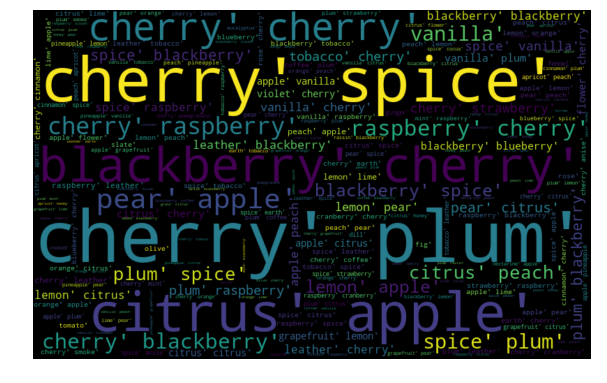

In [15]:
# WordCloud for all words
all_words = ' '.join([text for text in merge_table['clean_list']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

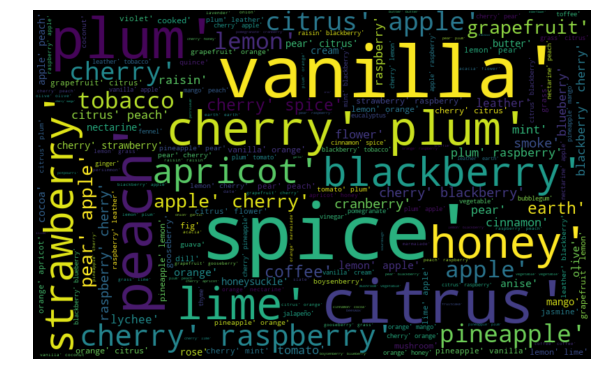

In [16]:
below_average =' '.join([text for text in merge_table['clean_list'][merge_table['Point Bins_80-84'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(below_average)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

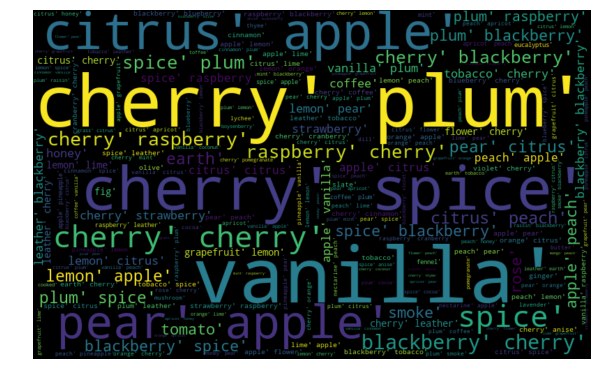

In [17]:
average =' '.join([text for text in merge_table['clean_list'][merge_table['Point Bins_85-89'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(average)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

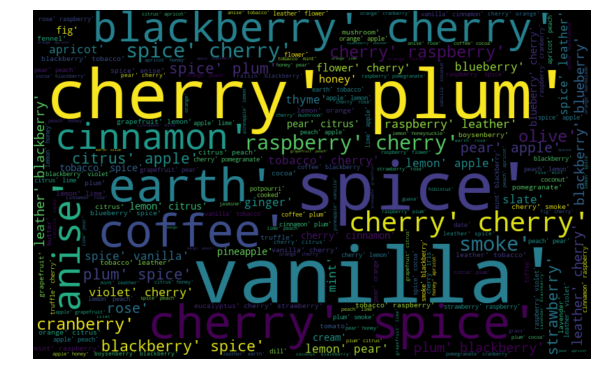

In [18]:
good =' '.join([text for text in merge_table['clean_list'][merge_table['Point Bins_90-94'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

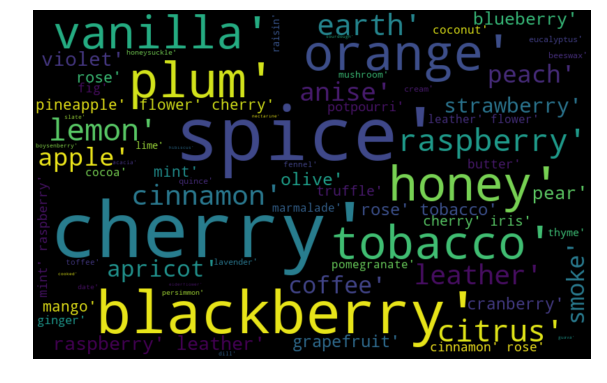

In [19]:
very_good =' '.join([text for text in merge_table['clean_list'][merge_table['Point Bins_95-100'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(very_good)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()